load data
plot data

In [1]:
import numpy as np
import pickle
import pandas as pd
import time
from umap import UMAP

In [2]:
from tfumap.paths import ensure_dir, MODEL_DIR, DATA_DIR

In [3]:
from tfumap.paths import FIGURE_DIR, save_fig

In [4]:
save_loc = DATA_DIR / 'reconstruction_acc' 

In [5]:
datasets = [
    #'cassins_dtw',
    'cifar10',
    'fmnist',
    #'macosko2015',
    'mnist'
]

In [6]:
recon_acc = pd.concat([pd.read_pickle(save_loc / (dataset + '.pickle')) for dataset in datasets])
recon_acc[:3]

,method_,dimensions,dataset,MSE,MAE,MedAE,R2
0,AE,2,cifar10,0.036410,0.149360,0.122907,0.390300
1,AE,64,cifar10,0.009391,0.068816,0.048234,0.843418
2,network,2,cifar10,0.036922,0.151219,0.125664,0.381821


In [7]:
median_df = (
    recon_acc[["method_", "dimensions", "dataset", "MSE"]]
    .groupby(["method_", "dimensions", "dataset"])
    .median()
)
median_df = median_df.T.melt()
median_df

,method_,dimensions,dataset,value
0,AE,2,cifar10,0.036410
1,AE,2,fmnist,0.024047
2,AE,2,mnist,0.035955
3,AE,64,cifar10,0.009391
4,AE,64,fmnist,0.009165
5,AE,64,mnist,0.002684
6,network,2,cifar10,0.036922
7,network,2,fmnist,0.026576
8,network,2,mnist,0.037375
9,network,64,cifar10,0.029988


In [8]:
import seaborn as sns

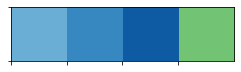

In [9]:
palette = sns.color_palette('Blues', 5)[2:] + sns.color_palette('Greens', 1)
sns.palplot(palette)

Text(0.5, 1, '64 Dimensions')

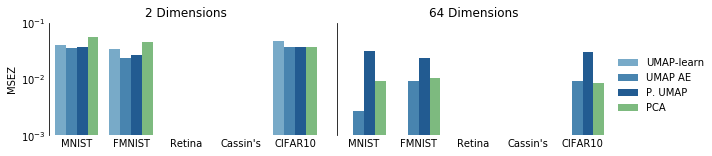

In [10]:
fg = sns.catplot(
    x="dataset",
    y="value",
    hue="method_",
    hue_order=["umap-learn", "AE", "network",  "pca"],
    order = ['mnist', 'fmnist', 'macosko2015', 'cassins_dtw', 'cifar10'],
    col="dimensions",
    height=2.5, 
    aspect=1.75,
    data=median_df,
    kind="bar",
    palette=palette,
    #legend=False
)
(fg.despine(bottom=True)
 .set_xticklabels(['MNIST', 'FMNIST', 'Retina', 'Cassin\'s', 'CIFAR10'])
 .set_axis_labels("", "MSEZ")
)
ax = fg.axes[0][0]
ax.tick_params(axis=u'both', which=u'both',length=0)
fg._legend._legend_title_box._text.set_text("")
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'umap-learn'))[0][0]].set_text('UMAP-learn')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'network'))[0][0]].set_text('P. UMAP')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'AE'))[0][0]].set_text('UMAP AE')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'pca'))[0][0]].set_text('PCA')
#fg._legend.texts[3].set_text("PCA")

ax.set_yscale('log'); ax.set_ylim([1e-3,1e-1])
#fg._legend.texts[2].set_text("Param. UMAP")

ax.set_title('2 Dimensions')
ax = fg.axes[0][1]
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_title('64 Dimensions')
#ax.set_yscale('log')

#save_fig(FIGURE_DIR/'recon_speed', save_pdf=True, dpi=300, pad_inches=0.1)